In [26]:
# Victor de Lima Souza 199335

import polars as pl

# Caminho do arquivo CSV
caminho_arquivo = "renda_adulta.csv.gz"

#Faça a importação do banco de dados utilizando os nomes das colunas conforme apresentado acima e na sequência ali indicada
nomes_colunas = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Definição dos tipos de dados
tipos_colunas = {
    "age": pl.Int64,
    "workclass": pl.Utf8,
    "fnlwgt": pl.Int64,
    "education": pl.Utf8,
    "education-num": pl.Int64,
    "marital-status": pl.Utf8,
    "occupation": pl.Utf8,
    "relationship": pl.Utf8,
    "race": pl.Utf8,
    "sex": pl.Utf8,
    "capital-gain": pl.Int64,
    "capital-loss": pl.Int64,
    "hours-per-week": pl.Int64,
    "native-country": pl.Utf8,
    "income": pl.Utf8
}

# Importação do dataset
renda_adulta = pl.read_csv(
    caminho_arquivo,
    has_header=False,
    new_columns=nomes_colunas,
    dtypes=tipos_colunas,
    null_values="?"
)

# Apresente os tipos de cada uma das coluna
print("Tipos das colunas:\n")
print(renda_adulta.schema)
print("\n")

# Apresente as dimensões da tabela de dados.
print("Dimensões da tabela:")
print(f"{renda_adulta.height} linhas e {renda_adulta.width} colunas\n")

# Quantas pessoas recebem acima de $50.000 e quantas pessoas recebem abaixo deste limiar?
contagem_renda = renda_adulta.group_by("income").count()

print("Contagem de indivíduos por faixa de renda:\n")
print(contagem_renda)



Tipos das colunas:

Schema({'age': Int64, 'workclass': String, 'fnlwgt': Int64, 'education': String, 'education-num': Int64, 'marital-status': String, 'occupation': String, 'relationship': String, 'race': String, 'sex': String, 'capital-gain': Int64, 'capital-loss': Int64, 'hours-per-week': Int64, 'native-country': String, 'income': String})


Dimensões da tabela:
32561 linhas e 15 colunas

Contagem de indivíduos por faixa de renda:

shape: (2, 2)
┌────────┬───────┐
│ income ┆ count │
│ ---    ┆ ---   │
│ str    ┆ u32   │
╞════════╪═══════╡
│ >50K   ┆ 7841  │
│ <=50K  ┆ 24720 │
└────────┴───────┘


/tmp/ipython-input-2037495879.py:35: DeprecationWarning: The argument `dtypes` for `read_csv` is deprecated. It has been renamed to `schema_overrides`.
  renda_adulta = pl.read_csv(
/tmp/ipython-input-2037495879.py:53: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  contagem_renda = renda_adulta.group_by("income").count()


In [27]:
# Transformar de formato wide para long
renda_longo = renda_adulta.melt(
    id_vars=[
        "age", "workclass", "fnlwgt", "education", "education-num",
        "marital-status", "occupation", "relationship", "race", "sex",
        "hours-per-week", "native-country", "income"
    ],
    value_vars=["capital-gain", "capital-loss"],  # colunas que serão "derretidas"
    variable_name="tipo",    # nome da coluna que indica o tipo (gain/loss)
    value_name="Valor"       # nome da coluna com os valores numéricos
)

print(renda_longo.head())


shape: (5, 15)
┌─────┬──────────────────┬────────┬───────────┬───┬────────────────┬────────┬──────────────┬───────┐
│ age ┆ workclass        ┆ fnlwgt ┆ education ┆ … ┆ native-country ┆ income ┆ tipo         ┆ Valor │
│ --- ┆ ---              ┆ ---    ┆ ---       ┆   ┆ ---            ┆ ---    ┆ ---          ┆ ---   │
│ i64 ┆ str              ┆ i64    ┆ str       ┆   ┆ str            ┆ str    ┆ str          ┆ i64   │
╞═════╪══════════════════╪════════╪═══════════╪═══╪════════════════╪════════╪══════════════╪═══════╡
│ 39  ┆ State-gov        ┆ 77516  ┆ Bachelors ┆ … ┆ United-States  ┆ <=50K  ┆ capital-gain ┆ 2174  │
│ 50  ┆ Self-emp-not-inc ┆ 83311  ┆ Bachelors ┆ … ┆ United-States  ┆ <=50K  ┆ capital-gain ┆ 0     │
│ 38  ┆ Private          ┆ 215646 ┆ HS-grad   ┆ … ┆ United-States  ┆ <=50K  ┆ capital-gain ┆ 0     │
│ 53  ┆ Private          ┆ 234721 ┆ 11th      ┆ … ┆ United-States  ┆ <=50K  ┆ capital-gain ┆ 0     │
│ 28  ┆ Private          ┆ 338409 ┆ Bachelors ┆ … ┆ Cuba           ┆ <=50K  

/tmp/ipython-input-3541339329.py:2: DeprecationWarning: `DataFrame.melt` is deprecated. Use `unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`
  renda_longo = renda_adulta.melt(


Média de horas trabalhadas por classe salarial:

shape: (2, 2)
┌────────┬─────────────────────────┐
│ income ┆ media_horas_trabalhadas │
│ ---    ┆ ---                     │
│ str    ┆ f64                     │
╞════════╪═════════════════════════╡
│ <=50K  ┆ 38.84021                │
│ >50K   ┆ 45.473026               │
└────────┴─────────────────────────┘

Número de pessoas amostradas em cada profissão:

shape: (15, 2)
┌─────────────────┬──────┐
│ occupation      ┆ len  │
│ ---             ┆ ---  │
│ str             ┆ u32  │
╞═════════════════╪══════╡
│ Prof-specialty  ┆ 4140 │
│ Craft-repair    ┆ 4099 │
│ Exec-managerial ┆ 4066 │
│ Adm-clerical    ┆ 3770 │
│ Sales           ┆ 3650 │
│ …               ┆ …    │
│ Farming-fishing ┆ 994  │
│ Tech-support    ┆ 928  │
│ Protective-serv ┆ 649  │
│ Priv-house-serv ┆ 149  │
│ Armed-Forces    ┆ 9    │
└─────────────────┴──────┘


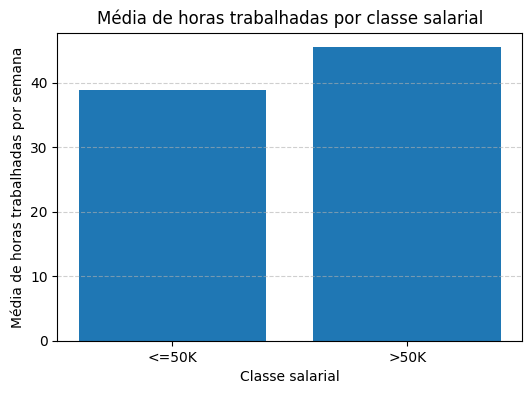

In [28]:
import matplotlib.pyplot as plt

# Quais são as médias de horas trabalhadas por classe salarial?
media_horas = (
    renda_adulta
    .group_by("income")
    .agg(pl.col("hours-per-week").mean().alias("media_horas_trabalhadas"))
)
print("Média de horas trabalhadas por classe salarial:\n")
print(media_horas)

# Se cada linha representa uma pessoa, quantas pessoas foram amostradas em cada profissão?
pessoas_por_profissao = (
    renda_adulta
    .group_by("occupation")
    .len() # Changed from .count() to .len()
    .sort("len", descending=True) # Changed from "count" to "len"
)
print("\nNúmero de pessoas amostradas em cada profissão:\n")
print(pessoas_por_profissao)

# Crie um gráfico de barras que apresente o número médio de horas trabalhadas semanalmente em função do nível salarial.
media_horas_pd = media_horas.to_pandas()

plt.figure(figsize=(6, 4))
plt.bar(media_horas_pd["income"], media_horas_pd["media_horas_trabalhadas"])
plt.title("Média de horas trabalhadas por classe salarial")
plt.xlabel("Classe salarial")
plt.ylabel("Média de horas trabalhadas por semana")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

Proporção de pessoas com renda > $50.000 por gênero:

shape: (2, 4)
┌────────┬───────┬───────────┬──────────────────────┐
│ sex    ┆ total ┆ acima_50K ┆ percentual_acima_50K │
│ ---    ┆ ---   ┆ ---       ┆ ---                  │
│ str    ┆ u32   ┆ u32       ┆ f64                  │
╞════════╪═══════╪═══════════╪══════════════════════╡
│ Male   ┆ 21790 ┆ 6662      ┆ 30.573658            │
│ Female ┆ 10771 ┆ 1179      ┆ 10.946059            │
└────────┴───────┴───────────┴──────────────────────┘


/tmp/ipython-input-739465643.py:3: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  total_por_sexo = renda_adulta.group_by("sex").count().rename({"count": "total"})
/tmp/ipython-input-739465643.py:10: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  .count()


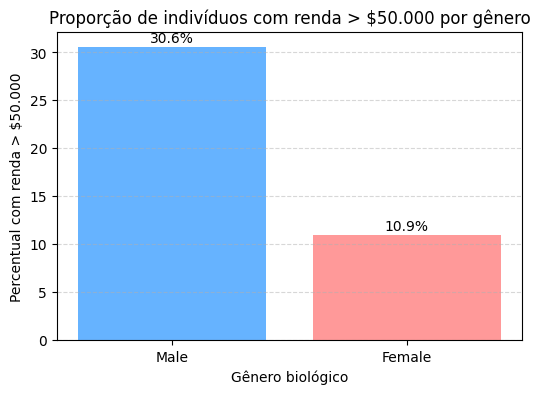

In [29]:
#Desafio: existe alguma evidência de discriminação salarial entre gêneros biológicos?

total_por_sexo = renda_adulta.group_by("sex").count().rename({"count": "total"})

# Contagem de pessoas que ganham mais de 50K por sexo
acima_50k = (
    renda_adulta
    .filter(pl.col("income") == ">50K")
    .group_by("sex")
    .count()
    .rename({"count": "acima_50K"})
)

# Unir as duas tabelas e calcular proporção
proporcao = (
    total_por_sexo.join(acima_50k, on="sex", how="left")
    .fill_null(0)  # caso algum grupo não tenha >50K
    .with_columns(
        (pl.col("acima_50K") / pl.col("total") * 100).alias("percentual_acima_50K")
    )
    .sort("percentual_acima_50K", descending=True)
)

print("Proporção de pessoas com renda > $50.000 por gênero:\n")
print(proporcao)

proporcao_pd = proporcao.to_pandas()

plt.figure(figsize=(6, 4))
plt.bar(proporcao_pd["sex"], proporcao_pd["percentual_acima_50K"], color=["#66b3ff", "#ff9999"])
plt.title("Proporção de indivíduos com renda > $50.000 por gênero")
plt.xlabel("Gênero biológico")
plt.ylabel("Percentual com renda > $50.000")
plt.grid(axis="y", linestyle="--", alpha=0.5)

for i, v in enumerate(proporcao_pd["percentual_acima_50K"]):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center")

plt.show()


In [30]:
import datetime
import pytz

# Get the current time in UTC
now_utc = datetime.datetime.now(datetime.timezone.utc)

# Define the Brasília time zone
brasilia_tz = pytz.timezone('America/Sao_Paulo')

# Convert the UTC time to Brasília time
now_brasilia = now_utc.astimezone(brasilia_tz)

# Format and print the date and time
print(f"Data e Horao: {now_brasilia.strftime('%Y-%m-%d %H:%M:%S %Z%z')}")

Data e Horao: 2025-10-07 11:12:36 -03-0300
